<a href="https://colab.research.google.com/github/scardenol/proc_est2/blob/main/esto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#!pip install yfinance # Se corre una vez

In [109]:
import numpy as np
import matplotlib.pyplot as plt #gráficas
import matplotlib as mpl
import seaborn as sns #gráficas
plt.style.use('ggplot') #estilo de graficas

# Pronóstico 1

## Punto 2


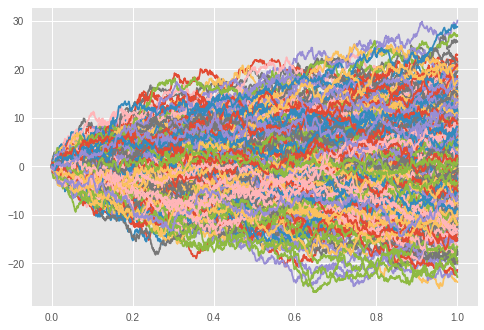

In [110]:
# Movimiento Browniano Estándar Unidimensional (MBEU)
N = 1000 # Movimientos o puntos en el tiempo
k = 500 # Simulaciones o trayectorias
delta_t = 0.1 # Partición
B = np.zeros((k, N+1))

for s in range(k):
  for t in range(1,N+1):
    B[s,t] = B[s,t-1] + np.sqrt(delta_t)*np.random.normal(0,1)

#B = np.array([[B[s,t-1] + np.sqrt(delta_t)*np.random.normal(0,1) for t in range(N)] for s in range(k)])
plt.figure();
for i in range(k):
  plt.plot(np.linspace(0, 1, N+1),B[i])

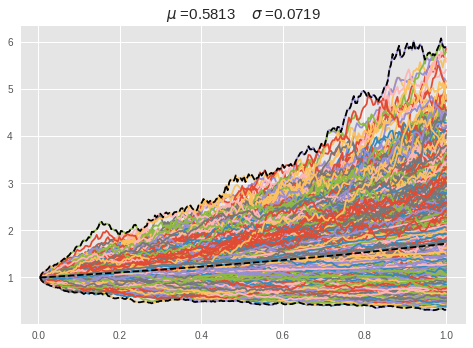

In [116]:
# EDE Lineal Homogénea dXt = F(t)Xt dt + G(t)Xt dBt, X(0)
# En este caso         dXt = mu*Xt dt + sigma*Xt dBt
# Con solución X(t) = X(t-1)*exp[(mu-0.5*sigma^2)dt + sigma*dBt]
import random as rnd

l = 10000 # número de simulaciones
p = 252 # número de observaciones

X = np.zeros((l,p))
dt = 1/p

plt.figure()
for sim in range(l):
  X[sim,0] = 1
  mu = rnd.random()
  sigma = rnd.random()*0.4
  for t in range(1, p):
    dBt = np.sqrt(dt)*np.random.normal(0,1)
    X[sim, t] = X[sim, t-1]*np.exp((mu-0.5*sigma**2)*dt + sigma*dBt)
  plt.plot(np.linspace(dt, 1, p), X[sim])

X_max = np.amax(X, axis=0)
X_min = np.amin(X, axis=0)
X_mean = np.mean(X, axis=0)

# Análisis longitudinal
plt.plot(np.linspace(dt, 1, p), X_max, '--', color='black')
plt.plot(np.linspace(dt, 1, p), X_min, '--', color='black')
plt.plot(np.linspace(dt, 1, p), X_mean, '--', color='black')

plt.title('$\mu$ =' + str(round(mu, 4)) + '    $\sigma$ =' + str(round(sigma,4)), fontsize = 15);

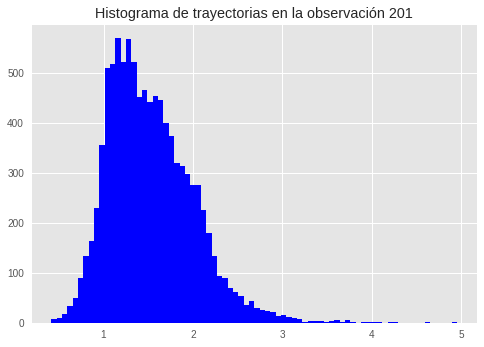

In [126]:
# Análisis transversal
X_tra = X[:, 200]

_ = plt.hist(X_tra, bins='auto', color='blue')
plt.title('Histograma de trayectorias en la observación 201');

In [133]:
# !pip install fitter # Corre una vez

,sumsquare_error,aic,bic,kl_div
gamma,0.234781,831.222132,-106566.779171,inf
lognorm,0.236589,764.284506,-106490.069923,inf
beta,0.357006,1006.914823,-102366.598723,inf
norm,0.820739,1390.567084,-94060.485083,inf


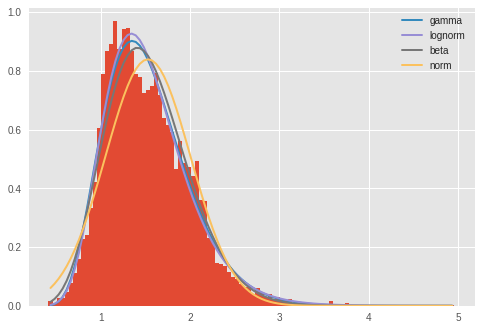

In [136]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(X_tra,
           distributions=['lognorm',
                          'gamma',
                          "beta",
                          "norm"])
f.fit()
f.summary()

In [151]:
params = f.fitted_param["lognorm"]
params

# Buscar por qué tiene 3

(0.2808754384102637, -0.12963847904294576, 1.5945053433552205)

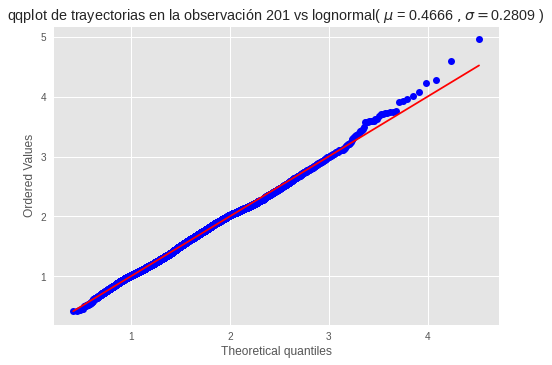

In [164]:
import pylab 
import scipy.stats as stats

sigma_hat = str(round(params[0],4))
mu_hat = str(round(np.log(params[2]), 4))

fig = plt.figure()
stats.probplot(X_tra, dist=stats.lognorm, sparams=params, plot=pylab);
plt.title('qqplot de trayectorias en la observación 201 vs lognormal( $\mu$ = ' + mu_hat + ' $,\sigma = $' + sigma_hat + ' )');

In [ ]:
# Condiciones a nivel de distribución

In [ ]:
# Autocorrelación parcial (graficar todas :) )

In [ ]:
# Dimensión fractal (indicador fractal?)

In [ ]:
# Varianza de largo plazo (pensarla)

## Punto 3

In [8]:
# yfinance package de https://pypi.org/project/yfinance/

import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055783,0.063987,0.055783,0.061252,1031788800,0.0,0.0
1986-03-14,0.061252,0.064533,0.061252,0.063439,308160000,0.0,0.0
1986-03-17,0.063439,0.065080,0.063439,0.064533,133171200,0.0,0.0
1986-03-18,0.064533,0.065080,0.062345,0.062892,67766400,0.0,0.0
1986-03-19,0.062892,0.063439,0.061252,0.061799,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2022-04-06,305.190002,307.000000,296.709991,299.500000,40110400,0.0,0.0
2022-04-07,296.660004,303.649994,296.350006,301.369995,31411200,0.0,0.0
2022-04-08,300.440002,301.119995,296.279999,296.970001,24347400,0.0,0.0
